# Decomposed_Learning_Results (CL* Algorithm)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp, kstest, shapiro, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# don't run this if you use jupyter notebook 
df =  pd.read_csv('/content/Results.csv',index_col=False)

In [ ]:
# don't run this if you use google colab 
df =  pd.read_csv('/Results.csv',index_col=False)

## Clean data

In [ ]:
def round_data(data):
  return round(data, 3)

In [ ]:
df = df[(df["STATES"]<=3840) & (df["STATES"]>300) ]

In [ ]:
df = df.dropna(axis=1, how='all')
df = df.dropna()

In [ ]:
# Calculate mean without outliers
from scipy import stats
def trimmed_mean(x):
  z = stats.zscore(x)
  d_z = x.loc[z<3,]
  return d_z.mean()

## Statistical Analysis

In [ ]:
# @title Bins
bins = [300,600,900,1200,1500,1800,2100,2400, 3840]
labels = []

We cluster the benchmark into eight categories based on the FSM’s number of states to summerize the results and illusterate them.

In [ ]:
# Data Distribution
print("Count:  ",df['FILE_NAME'].unique().size)
print("Min:    ",df.groupby('FILE_NAME').agg(min)['STATES'].min())
print("Max:    ",df.groupby('FILE_NAME').agg(min)['STATES'].max())

print("mean:   ", df.groupby('FILE_NAME').agg(min)['STATES'].mean())

print("std:    ", df.groupby('FILE_NAME').agg(min)['STATES'].std())

Count:   99
Min:     312
Max:     3840
mean:    1270.2222222222222
std:     847.5170885707857


In [ ]:
# calculate the progress 

df['CLSTAR_TOTAL_RST_progress'] = (1 - (df['CLSTAR_TOTAL_RST'] / df['CLSTAR_TOTAL_RST']))*100
df['CLSTAR_TOTAL_SYM_progress'] = (1 - (df['CLSTAR_TOTAL_SYM'] / df['CLSTAR_TOTAL_SYM']))*100

df['CLSTAR_MQ_SYM_progress'] = (1 - (df['CLSTAR_MQ_SYM'] / df['CLSTAR_MQ_SYM']))*100
df['CLSTAR_MQ_RST_progress'] = (1 - (df['CLSTAR_MQ_RST'] / df['CLSTAR_MQ_RST']))*100
df['CLSTAR_EQ_SYM_progress'] = (1 - (df['CLSTAR_EQ_SYM'] / df['CLSTAR_EQ_SYM']))*100
df['CLSTAR_EQ_RST_progress'] = (1 - (df['CLSTAR_EQ_RST'] / df['CLSTAR_EQ_RST']))*100


In [ ]:
# @title Check for normal
for i in range(0, len(bins)-1):
    data = df[df['STATES']>bins[i] & (df['STATES']<=bins[i+1])]
    states_count = data.loc[:,'STATES']
    input_count = data.loc[:,'INPUTS']
    # print(len(data))
    lstar_resets_count = data.loc[:,  'CLSTAR_TOTAL_RST']
    CLSTAR_resets_count = data.loc[:, 'CLSTAR_TOTAL_RST']
    lstar_symbols_count = data.loc[:, 'CLSTAR_TOTAL_SYM']
    CLSTAR_symbols_count = data.loc[:,'CLSTAR_TOTAL_SYM']
    print(bins[i],  '-', bins[i+1])
    print(kstest(states_count,'norm'))
    print(kstest(lstar_resets_count,'norm'))
    print(kstest(CLSTAR_resets_count,'norm'))
    print(kstest(lstar_symbols_count,'norm'))
    print(kstest(CLSTAR_symbols_count,'norm'))

    print(shapiro(states_count))
    print(shapiro(lstar_resets_count))
    print(shapiro(CLSTAR_resets_count))
    print(shapiro(lstar_symbols_count))
    print(shapiro(CLSTAR_symbols_count))




300 - 600
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.8899503946304321, pvalue=5.465050776365388e-07)
ShapiroResult(statistic=0.4499932527542114, pvalue=1.5664201800269703e-17)
ShapiroResult(statistic=0.4499932527542114, pvalue=1.5664201800269703e-17)
ShapiroResult(statistic=0.49176621437072754, pvalue=6.904820018370454e-17)
ShapiroResult(statistic=0.49176621437072754, pvalue=6.904820018370454e-17)
600 - 900
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
KstestResult(statistic=1.0, pvalue=0.0)
ShapiroResult(statistic=0.8899503946304321, pvalue=5.465050776365388e-07)
ShapiroResult(statistic=0.4499932527542114, pvalue=1.5664201800269703e-17)
ShapiroResult(statistic=0.4499932527542114, pvalue=1.5664

In [ ]:
# @title Cluster Items

grouped = df.groupby(pd.cut(df["STATES"],bins))
df3 = grouped.agg(
    # states = pd.NamedAgg(column='STATES', aggfunc="min"),
    inputs=pd.NamedAgg(column="INPUTS", aggfunc='median'),

    LSTAR_total_sym_median=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='median'),
    LSTAR_total_sym_mean=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc='mean'),
    LSTAR_total_sym_std=pd.NamedAgg(column='LSTAR_TOTAL_SYM', aggfunc="std"),
    LSTAR_total_reset_median=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='median'),
    LSTAR_total_reset_mean=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc='mean'),
    LSTAR_total_reset_std=pd.NamedAgg(column='LSTAR_TOTAL_RST', aggfunc="std"),
    LSTAR_mq_sym_mean=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc='median'),
    LSTAR_mq_sym_std=pd.NamedAgg(column='LSTAR_MQ_SYM', aggfunc="std"),
    LSTAR_mq_reset_mean=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc='median'),
    LSTAR_mq_reset_std=pd.NamedAgg(column='LSTAR_MQ_RST', aggfunc="std"),
    LSTAR_eq_sym_mean=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc='median'),
    LSTAR_eq_sym_std=pd.NamedAgg(column='LSTAR_EQ_SYM', aggfunc="std"),
    LSTAR_eq_reset_mean=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc='median'),
    LSTAR_eq_reset_std=pd.NamedAgg(column='LSTAR_EQ_RST', aggfunc="std"),
    LSTAR_eqs=pd.NamedAgg(column='LSTAR_EQs', aggfunc='median'),

    CLSTAR_total_sym_median=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='mean'),
    CLSTAR_total_sym_mean=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc='median'),
    CLSTAR_total_sym_std=pd.NamedAgg(column='CLSTAR_TOTAL_SYM', aggfunc="std"),
    CLSTAR_total_reset_median=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='median'),
    CLSTAR_total_reset_mean=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc='mean'),
    CLSTAR_total_reset_std=pd.NamedAgg(column='CLSTAR_TOTAL_RST', aggfunc="std"),
    CLSTAR_mq_sym_mean=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc='median'),
    CLSTAR_mq_sym_std=pd.NamedAgg(column='CLSTAR_MQ_SYM', aggfunc="std"),
    CLSTAR_mq_reset_mean=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc='median'),
    CLSTAR_mq_reset_std=pd.NamedAgg(column='CLSTAR_MQ_RST', aggfunc="std"),
    CLSTAR_eq_sym_mean=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc='median'),
    CLSTAR_eq_sym_std=pd.NamedAgg(column='CLSTAR_EQ_SYM', aggfunc="std"),
    CLSTAR_eq_reset_mean=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc='median'),
    CLSTAR_eq_reset_std=pd.NamedAgg(column='CLSTAR_EQ_RST', aggfunc="std"),
    CLSTAR_eqs=pd.NamedAgg(column='CLSTAR_EQs', aggfunc='median'),
    CLSTAR_components=pd.NamedAgg(column='CLSTAR_COMPONENTS', aggfunc='median'),
    CLSTAR_rounds=pd.NamedAgg(column='CLSTAR_ROUNDS', aggfunc='median'),

).reset_index()


In [ ]:
# Progress
df3['CLSTAR_TOTAL_SYM_progress'] = (1 - (df3['CLSTAR_total_sym_mean'] / df3['LSTAR_total_sym_mean']))*100
df3['CLSTAR_TOTAL_RST_progress'] = (1 - (df3['CLSTAR_total_reset_mean'] / df3['LSTAR_total_reset_mean']))*100
df3['CLSTAR_MQ_SYM_progress'] = (1 - (df3['CLSTAR_mq_sym_mean'] / df3['LSTAR_mq_sym_mean']))*100
df3['CLSTAR_MQ_RST_progress'] = (1 - (df3['CLSTAR_mq_reset_mean'] / df3['LSTAR_mq_reset_mean']))*100
df3['CLSTAR_EQ_SYM_progress'] = (1 - (df3['CLSTAR_eq_sym_mean'] / df3['LSTAR_eq_sym_mean']))*100
df3['CLSTAR_EQ_RST_progress'] = (1 - (df3['CLSTAR_eq_reset_mean'] / df3['LSTAR_eq_reset_mean']))*100

In [ ]:
# @title Pvalue 
pvalue_info = {'STATES':[],
'CLSTAR_TOTAL_SYM_pvalue':[],
'CLSTAR_TOTAL_RST_pvalue':[],
              }
for index, row in df3.iterrows():
  data_range = row['STATES']
  filtered_df = df[(df['STATES']<data_range.right) & (df['STATES']>=data_range.left)]
  mq_sym_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_SYM'], filtered_df.loc[:,'LSTAR_TOTAL_SYM'], alternative='less').pvalue
  eq_reset_ttest = ttest_rel(filtered_df.loc[:,'CLSTAR_TOTAL_RST'], filtered_df.loc[:,'LSTAR_TOTAL_RST'], alternative='less').pvalue

  pvalue_info['STATES'].append(data_range)
  pvalue_info['CLSTAR_TOTAL_SYM_pvalue'].append(mq_sym_ttest)
  pvalue_info['CLSTAR_TOTAL_RST_pvalue'].append(eq_reset_ttest)

pvalue_df = pd.DataFrame(pvalue_info)
final_df = pd.merge(df3, pvalue_df,how='right', on='STATES')



In [ ]:
final_df['CLSTAR_TOTAL_SYM_pvalue']

0    0.288210
1    0.016979
2    0.002906
3    0.003283
4    0.023974
5    0.008143
6    0.011124
7    0.002087
Name: CLSTAR_TOTAL_SYM_pvalue, dtype: float64

In [ ]:
final_df.columns

Index(['STATES', 'inputs', 'LSTAR_total_sym_median', 'LSTAR_total_sym_mean',
       'LSTAR_total_sym_std', 'LSTAR_total_reset_median',
       'LSTAR_total_reset_mean', 'LSTAR_total_reset_std', 'LSTAR_mq_sym_mean',
       'LSTAR_mq_sym_std', 'LSTAR_mq_reset_mean', 'LSTAR_mq_reset_std',
       'LSTAR_eq_sym_mean', 'LSTAR_eq_sym_std', 'LSTAR_eq_reset_mean',
       'LSTAR_eq_reset_std', 'LSTAR_eqs', 'CLSTAR_total_sym_median',
       'CLSTAR_total_sym_mean', 'CLSTAR_total_sym_std',
       'CLSTAR_total_reset_median', 'CLSTAR_total_reset_mean',
       'CLSTAR_total_reset_std', 'CLSTAR_mq_sym_mean', 'CLSTAR_mq_sym_std',
       'CLSTAR_mq_reset_mean', 'CLSTAR_mq_reset_std', 'CLSTAR_eq_sym_mean',
       'CLSTAR_eq_sym_std', 'CLSTAR_eq_reset_mean', 'CLSTAR_eq_reset_std',
       'CLSTAR_eqs', 'CLSTAR_components', 'CLSTAR_rounds',
       'CLSTAR_TOTAL_SYM_progress', 'CLSTAR_TOTAL_RST_progress',
       'CLSTAR_MQ_SYM_progress', 'CLSTAR_MQ_RST_progress',
       'CLSTAR_EQ_SYM_progress', 'CLSTAR_EQ_R

## Tables 

In [ ]:
# @title Table 1
final_df[["STATES", "LSTAR_total_reset_mean", "LSTAR_total_reset_std", "CLSTAR_total_reset_mean", "CLSTAR_total_reset_std", "CLSTAR_TOTAL_RST_progress" ,"CLSTAR_TOTAL_RST_pvalue" ]]

,STATES,LSTAR_total_reset_mean,LSTAR_total_reset_std,CLSTAR_total_reset_mean,CLSTAR_total_reset_std,CLSTAR_TOTAL_RST_progress,CLSTAR_TOTAL_RST_pvalue
0,"(300, 600]",1.839137e+05,76190.179802,20141.785714,36295.961940,89.048242,1.081857e-13
1,"(600, 900]",4.158387e+05,119647.867176,59675.444444,68547.172842,85.649378,7.012891e-11
2,"(900, 1200]",5.780183e+05,138664.228397,29732.461538,39938.359701,94.856138,5.704933e-09
3,"(1200, 1500]",7.116730e+05,156977.366991,51577.714286,53350.913390,92.752610,8.728401e-06
4,"(1500, 1800]",9.114340e+05,216329.497779,52288.200000,79793.931267,94.263084,5.030828e-07
5,"(1800, 2100]",1.082066e+06,220877.009428,56324.000000,63868.504660,94.794772,5.461332e-04
6,"(2100, 2400]",1.448906e+06,348332.349014,53275.600000,59253.231995,96.323045,3.760497e-04
7,"(2400, 3840]",1.929013e+06,448011.627599,132254.769231,223938.501428,93.143916,2.062577e-07


In [ ]:
# @title Table 2
final_df[["STATES", "LSTAR_total_sym_mean", "LSTAR_total_sym_std", "CLSTAR_total_sym_mean", "CLSTAR_total_sym_std", "CLSTAR_TOTAL_SYM_progress" ,"CLSTAR_TOTAL_SYM_pvalue" ]]

,STATES,LSTAR_total_sym_mean,LSTAR_total_sym_std,CLSTAR_total_sym_mean,CLSTAR_total_sym_std,CLSTAR_TOTAL_SYM_progress,CLSTAR_TOTAL_SYM_pvalue
0,"(300, 600]",2.214467e+06,3.244202e+06,1096000.5,2.743276e+06,50.507258,0.288210
1,"(600, 900]",7.733144e+06,7.399123e+06,1453749.5,5.642525e+06,81.201056,0.016979
2,"(900, 1200]",6.721459e+06,5.311124e+06,1478916.0,2.925458e+06,77.997100,0.002906
3,"(1200, 1500]",1.001110e+07,7.371663e+06,1337638.0,4.002623e+06,86.638454,0.003283
4,"(1500, 1800]",1.053917e+07,8.670238e+06,1356718.0,5.768175e+06,87.126898,0.023974
5,"(1800, 2100]",1.287999e+07,4.501575e+06,1739824.0,4.528051e+06,86.492040,0.008143
6,"(2100, 2400]",1.890300e+07,1.119019e+07,1652967.0,4.351544e+06,91.255533,0.011124
7,"(2400, 3840]",2.547000e+07,1.022910e+07,8017340.0,1.554950e+07,68.522413,0.002087


In [ ]:
final_df.to_csv("Results_summerized.csv")

# Plots

In [ ]:
sns.set(rc={'figure.figsize':(15,6)})

<ipython-input-76-2ba850dec2b1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
<ipython-input-76-2ba850dec2b1>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d1['state_range'] = pd.cut(d1['STATES'], bins= bins)


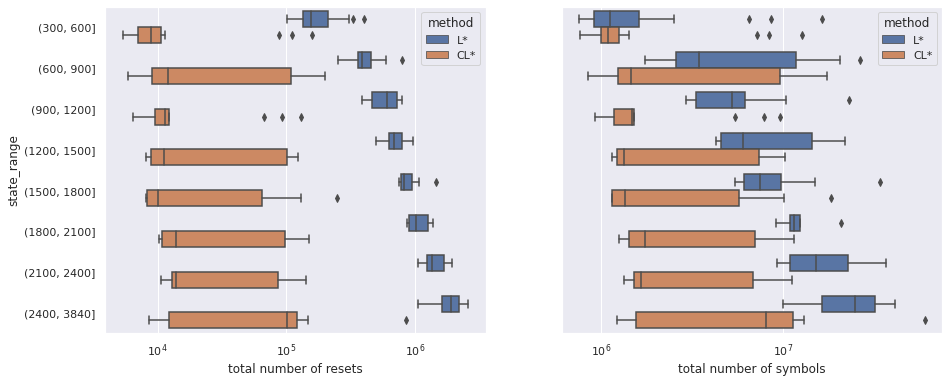

In [ ]:
#  @title Fig 2. The total number of input symbols and resets in the CL∗ and L∗ methods
fig, axs = plt.subplots(ncols=2)

d2 = df[['STATES', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]
d2['state_range'] = pd.cut(d2['STATES'], bins= bins)
d2 = d2.set_index('state_range')

d2[['L*',  'CL*']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST']] 

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_1": "method", 0: "total number of resets"})

g1 = sns.boxplot(y = d2['state_range'],
			x = d2['total number of resets'],
			hue = d2['method'],
       showcaps=True,orient="h", ax=axs[0]).set_xscale('log')


d1 = df[['STATES', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]
d1['state_range'] = pd.cut(d1['STATES'], bins= bins)
d1 = d1.set_index('state_range')
d1[['L*',  'CL*']] = d1[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM']] 
d1 = d1[['L*',  'CL*']].stack().reset_index()
d1 = d1.rename(columns={"level_1": "method", 0: "total number of symbols"})

g2 = sns.boxplot(y = d1['state_range'],
			x = d1['total number of symbols'],
			hue = d1['method'],
       showcaps=True,orient="h", ax=axs[1])
g2.set_xscale('log')

g2.set(yticklabels=[])
g2.set(ylabel=None)
g2.tick_params(bottom=False) 
# plt.grid()
# plt.show()


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


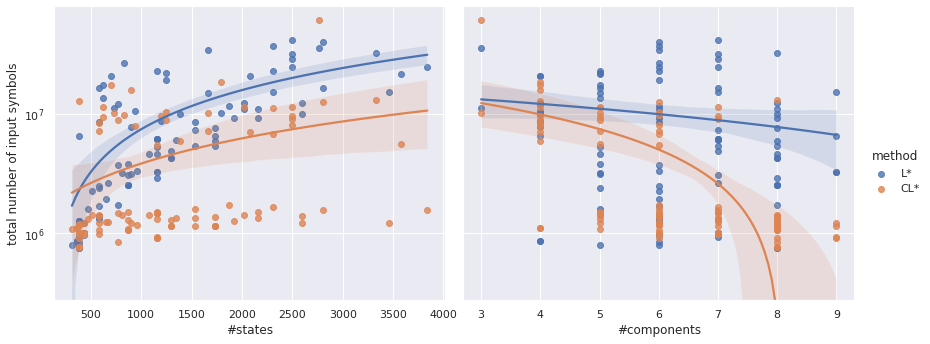

In [ ]:
# @title Fig.3: The effect of FSM size in terms of number of components and states on total number of input symbols.
d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_SYM', 'CLSTAR_TOTAL_SYM']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_SYM',  'CLSTAR_TOTAL_SYM', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of input symbols"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of input symbols"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


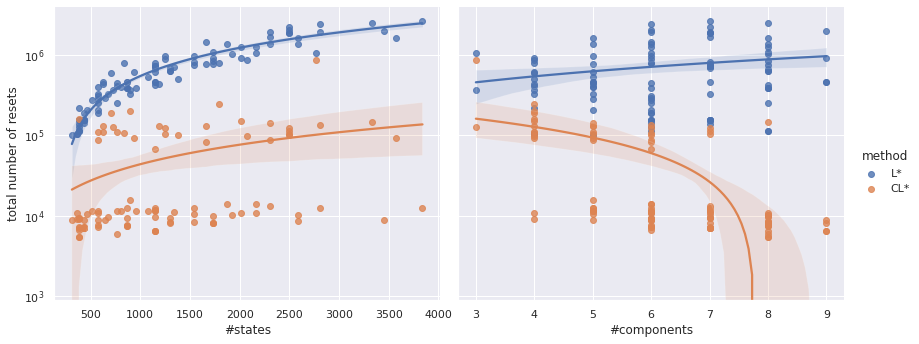

In [ ]:
# @title Fig.4: The effect of FSM size in terms of number of components and states on total number of input resets.

d2 = df[['STATES','CLSTAR_COMPONENTS', 'LSTAR_TOTAL_RST', 'CLSTAR_TOTAL_RST']]

d2[['L*',  'CL*', '#components', '#states']] = d2[['LSTAR_TOTAL_RST',  'CLSTAR_TOTAL_RST', 'CLSTAR_COMPONENTS', 'STATES']] 
d2 = d2.set_index(['#states','#components'])

d2 = d2[['L*',  'CL*']].stack().reset_index()
d2 = d2.rename(columns={"level_2": "method", 0: "total number of resets"})

sns.pairplot(d2, x_vars=["#states", "#components"], y_vars=["total number of resets"],
             hue="method", height=5, aspect=1.2, kind="reg" );
plt.yscale('log')
